/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_18169/2702595777.py:16: UserWarning: loadtxt: input contained no data: "dataShu4/v0b0.txt"
  evec = np.loadtxt(path)
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_18169/2702595777.py:16: UserWarning: loadtxt: input contained no data: "dataShu4/v0b2.txt"
  evec = np.loadtxt(path)
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_18169/2702595777.py:16: UserWarning: loadtxt: input contained no data: "dataShu4/v0b3.txt"
  evec = np.loadtxt(path)
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_18169/2702595777.py:16: UserWarning: loadtxt: input contained no data: "dataShu4/v10b0.txt"
  evec = np.loadtxt(path)
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_18169/2702595777.py:16: UserWarning: loadtxt: input contained no data: "dataShu4/v10b1.txt"
  evec = np.loadtxt(path)
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_18169/2702595777.py:16: UserWarning: loadtxt: input contain

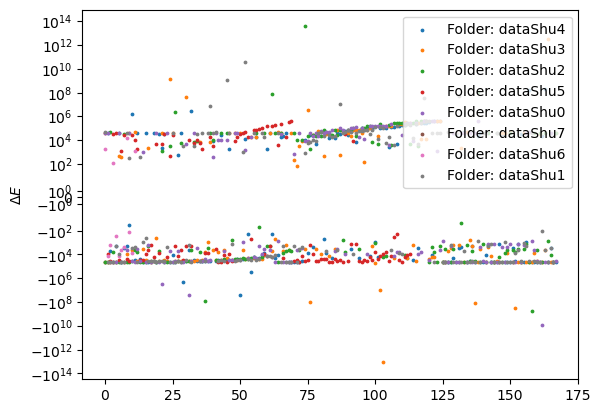

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from fast_histogram import histogram1d
import glob

plt.clf()

for f in glob.glob('dataShu*'):
    folder = f
    energies = sorted(os.listdir(folder))
    Efinal = []

    for e in energies:
        path = os.path.join(folder, e)
        evec = np.loadtxt(path)

        if evec.size == 0:
            #print(f"Skipped empty file: {e}")
            continue

        if evec.size == 1:
            Efinal.append(evec)
            continue

        Efinal.append(evec[-1]-evec[0])

    Efinal = np.array(Efinal)
    plt.scatter(range(len(Efinal)), Efinal, s=3, label=f'Folder: {folder}')

plt.ylabel(r'$\Delta E$')
#plt.scatter(range(len(Efinal)), Efinal, s=1)
plt.yscale('symlog')
plt.legend()
plt.show()

Folder: dataShu4, log(bmin): 10.14, log(bmax): 11.16
Folder: dataShu3, log(bmin): 13.56, log(bmax): 14.58
Folder: dataShu2, log(bmin): 12.42, log(bmax): 13.44
Folder: dataShu5, log(bmin): 11.28, log(bmax): 12.30
Folder: dataShu0, log(bmin): 14.70, log(bmax): 15.72
Folder: dataShu7, log(bmin): 9.00, log(bmax): 10.03
log_histogram: no data to plot
Folder: dataShu6, log(bmin): 16.97, log(bmax): 18.00
Folder: dataShu1, log(bmin): 15.84, log(bmax): 16.86


/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_15997/2087247383.py:51: UserWarning: loadtxt: input contained no data: "dataShu4/v0b0.txt"
  evec = np.loadtxt(path)
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_15997/2087247383.py:51: UserWarning: loadtxt: input contained no data: "dataShu4/v0b2.txt"
  evec = np.loadtxt(path)
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_15997/2087247383.py:51: UserWarning: loadtxt: input contained no data: "dataShu4/v0b3.txt"
  evec = np.loadtxt(path)
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_15997/2087247383.py:51: UserWarning: loadtxt: input contained no data: "dataShu4/v10b0.txt"
  evec = np.loadtxt(path)
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_15997/2087247383.py:51: UserWarning: loadtxt: input contained no data: "dataShu4/v10b1.txt"
  evec = np.loadtxt(path)
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_15997/2087247383.py:51: UserWarning: loadtxt: input contain

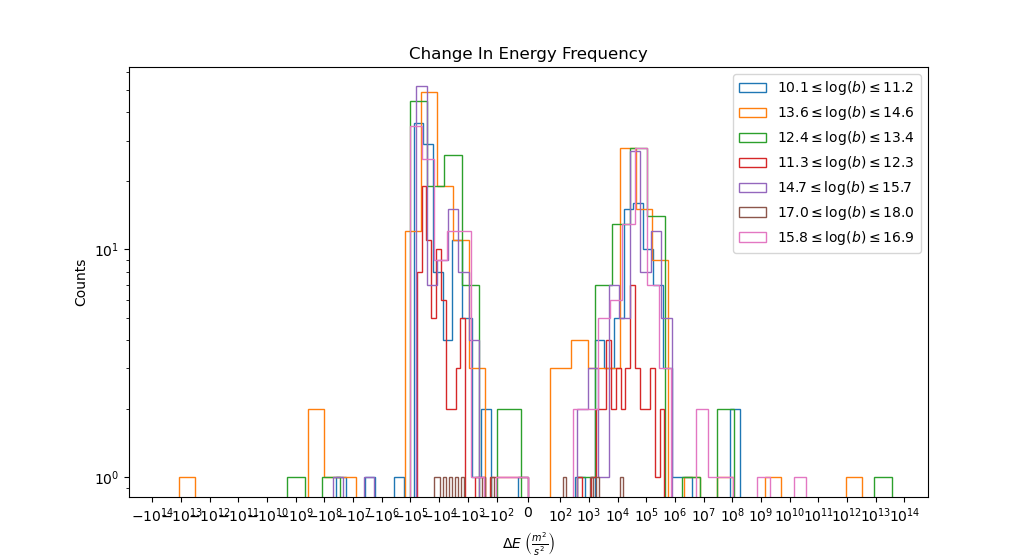

In [ ]:
%matplotlib widget
import math
import re

plt.clf()

def log_histogram(data, bins, label):
    data = np.array(data)
    if data.size == 0:
        print("log_histogram: no data to plot")
        return
    positive_data = data[data > 0]
    negative_data = -data[data < 0]

    min_val = min(positive_data.min(), negative_data.min())
    max_val = max(positive_data.max(), negative_data.max())

    log_bins = np.logspace(np.log10(min_val), np.log10(max_val), num=bins+1)

    neg_bins = -log_bins[::-1]
    all_bins = np.concatenate([neg_bins, [0], log_bins])

    counts, edges = np.histogram(data, bins=all_bins)

    plt.hist(data, bins=all_bins, histtype='step', label = label)

class SplitArray:
    def __init__(self, array, m):
        self.array = array
        self.m = m
        self.n = len(array)
        self.chunk_size = self.n // m
        self.remainder = self.n % m

    def __getitem__(self, index):
        if index >= self.m or index < -self.m:
            raise IndexError("Split index out of range")

        if index < 0:
            index += self.m

        start = index * self.chunk_size + min(index, self.remainder)
        end = start + self.chunk_size
        if index < self.remainder:
            end += 1
        return self.array[start:end]

    def __len__(self):
        return self.m

bbins = SplitArray(np.logspace(9, 18, 80), 8)
cs = math.sqrt(3.36) * 100
Nv = 30
vvec = np.logspace(np.log10(cs / 10), np.log10(cs * 5), Nv)
folder_re = re.compile(r"dataShu(\d+)")

for f in glob.glob('dataShu*'):
    m = folder_re.match(folder)
    if not m:
        continue
    folder_idx = int(m.group(1))
    bmin = min(bbins[folder_idx])
    bmax = max(bbins[folder_idx])
    print(f"Folder: {f}, log(bmin): {np.log10(bmin):.2f}, log(bmax): {np.log10(bmax):.2f}")
    folder = f
    energies = sorted(os.listdir(folder))
    Efinal = []

    for e in energies:
        path = os.path.join(folder, e)
        evec = np.loadtxt(path)

        if evec.size == 0:
            #print(f"Skipped empty file: {e}")
            continue

        if evec.size == 1:
            Efinal.append(evec)
            continue

        Efinal.append(evec[-1]-evec[0])

    Efinal = np.array(Efinal)
    log_histogram(Efinal, bins=20, label = rf'${np.log10(bmin):.1f} \leq \log(b) \leq {np.log10(bmax):.1f}$')

plt.xscale('symlog', linthresh=1e2)
plt.yscale('log')
plt.xlabel(r'$\Delta E$ $\left(\frac{m^2}{s^2}\right)$')
plt.ylabel('Counts')
plt.legend()
plt.title('Change In Energy Frequency')
plt.show()

/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_15997/2856394447.py:58: UserWarning: loadtxt: input contained no data: "dataShu7/v0b0.txt"
  arr = np.loadtxt(os.path.join(folder, fname))
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_15997/2856394447.py:58: UserWarning: loadtxt: input contained no data: "dataShu7/v0b1.txt"
  arr = np.loadtxt(os.path.join(folder, fname))
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_15997/2856394447.py:58: UserWarning: loadtxt: input contained no data: "dataShu7/v0b2.txt"
  arr = np.loadtxt(os.path.join(folder, fname))
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_15997/2856394447.py:58: UserWarning: loadtxt: input contained no data: "dataShu7/v0b3.txt"
  arr = np.loadtxt(os.path.join(folder, fname))
/var/folders/rd/thp_lwbs14n9hkhhc4r29lfw0000gn/T/ipykernel_15997/2856394447.py:58: UserWarning: loadtxt: input contained no data: "dataShu7/v0b4.txt"
  arr = np.loadtxt(os.path.join(folder, fname))
/var/folde

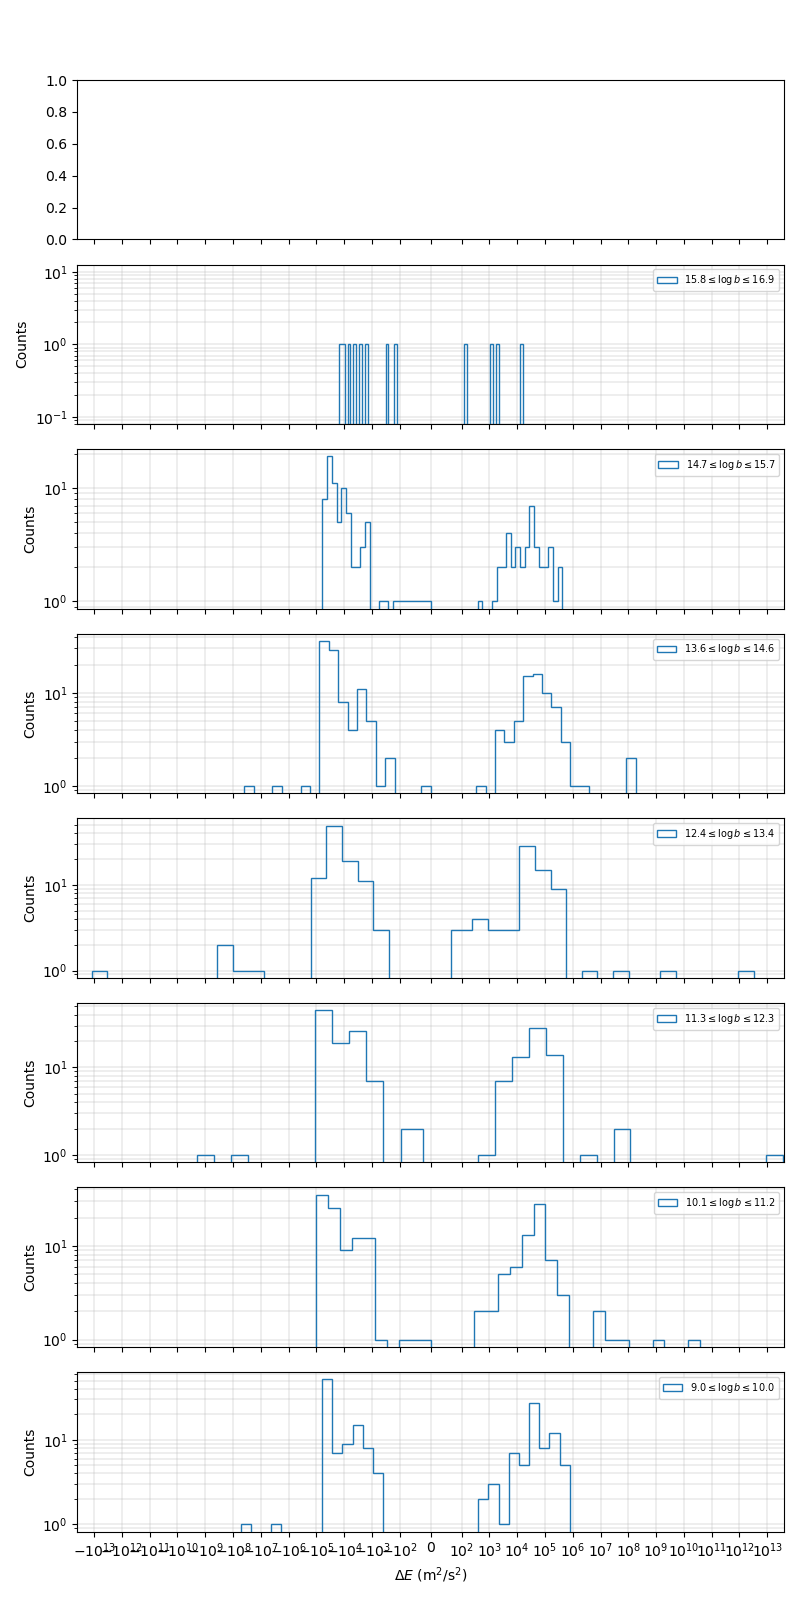

In [ ]:
%matplotlib widget
import math, re, os, glob
import numpy as np
import matplotlib.pyplot as plt

def log_histogram(data, bins, label, ax):
    data = np.array(data)
    if data.size == 0:
        return
    pos = data[data > 0]
    neg = -data[data < 0]

    if pos.size and neg.size:
        mn = min(pos.min(), neg.min())
        mx = max(pos.max(), neg.max())
        logb = np.logspace(np.log10(mn), np.log10(mx), bins+1)
        bins_all = np.concatenate([-logb[::-1], [0], logb])
    elif pos.size:
        mn, mx = pos.min(), pos.max()
        bins_all = np.logspace(np.log10(mn), np.log10(mx), bins+1)
    else:
        negv = neg
        mn, mx = negv.min(), negv.max()
        logb = np.logspace(np.log10(mn), np.log10(mx), bins+1)
        bins_all = -logb[::-1]

    ax.hist(data, bins=bins_all, histtype='step', label=label)
    ax.set_yscale('log')
    ax.grid(True, which='both', lw=0.3)
    ax.set_ylabel('Counts')
    ax.legend(fontsize=7, loc='upper right')


folders  = sorted(glob.glob('dataShu*'),
                  key=lambda f: int(re.match(r"dataShu(\d+)", f).group(1)),
                  reverse=True)   # highest b‐index first
n = len(folders)

fig, axes = plt.subplots(n, 1,
                         figsize=(8, 2*n),
                         sharex=True)
# if n==1, axes is not a list, so wrap:
if n == 1:
    axes = [axes]

bbins     = SplitArray(np.logspace(9, 18, 80), 8)
folder_re = re.compile(r"dataShu(\d+)")

for ax, folder in zip(axes, folders):
    idx = int(folder_re.match(folder).group(1))
    bmin, bmax = min(bbins[idx]), max(bbins[idx])
    label = rf'${np.log10(bmin):.1f}\leq\log b\leq{np.log10(bmax):.1f}$'

    Efinal = []
    for fname in sorted(os.listdir(folder)):
        arr = np.loadtxt(os.path.join(folder, fname))
        if arr.size == 0:      continue
        Δ = arr.item() if arr.size==1 else arr[-1]-arr[0]
        Efinal.append(Δ)

    log_histogram(Efinal, bins=20, label=label, ax=ax)

axes[-1].set_xscale('symlog', linthresh=1e2)
axes[-1].set_xlabel(r'$\Delta E\ (\mathrm{m}^2/\mathrm{s}^2)$')

fig.suptitle("Change In Energy Frequency\n(highest b‐bin on top)", y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()
